In [1]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [70]:
#Fetch Images count from Fodlers

In [2]:
count = 0 
dirs = os.listdir('flower-image/')
for dir in dirs:
    files = list(os.listdir('flower-image/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' flower-image')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' flower-image')

daisy-20250110T161632Z-001 Folder has 1 flower-image
dandelion-20250110T161755Z-001 Folder has 1 flower-image
rose Folder has 784 flower-image
sunflower-20250110T162320Z-001 Folder has 1 flower-image
tulip-20250110T162421Z-001 Folder has 1 flower-image
Images Folder has 788 flower-image


In [72]:
#Load Images into Arrays as Dataset

In [3]:
base_dir = 'flower-image/'
img_size = 180
batch = 32

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [5]:
flower_names = train_ds.class_names
flower_names

['daisy-20250110T161632Z-001',
 'dandelion-20250110T161755Z-001',
 'rose',
 'sunflower-20250110T162320Z-001',
 'tulip-20250110T162421Z-001']

In [6]:
import matplotlib.pyplot as plt

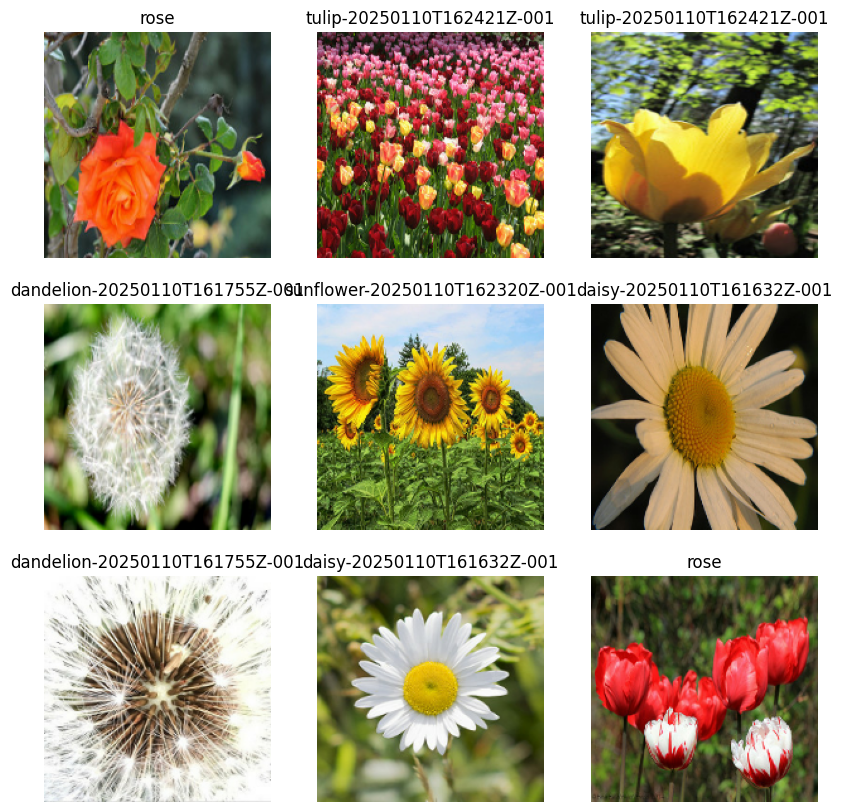

In [7]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [10]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [81]:
#Data Augmentation

In [11]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

c:\Users\Asus\miniconda3\envs\dl\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


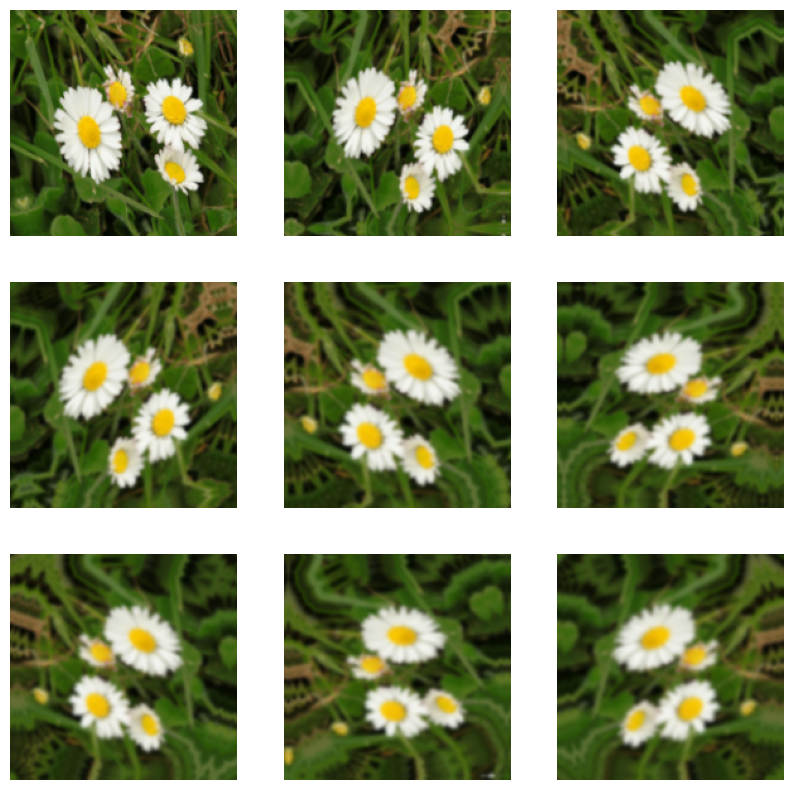

In [12]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [84]:
#MOdel Creation

In [13]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 344ms/step - accuracy: 0.3244 - loss: 1.6069 - val_accuracy: 0.5052 - val_loss: 1.1442
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 31s 286ms/step - accuracy: 0.5502 - loss: 1.1105 - val_accuracy: 0.5678 - val_loss: 1.0628
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 31s 290ms/step - accuracy: 0.6047 - loss: 0.9966 - val_accuracy: 0.6107 - val_loss: 0.9507
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 31s 285ms/step - accuracy: 0.6356 - loss: 0.9114 - val_accuracy: 0.6477 - val_loss: 0.9002
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 279ms/step - accuracy: 0.6567 - loss: 0.8623 - val_accuracy: 0.6616 - val_loss: 0.8583
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 278ms/step - accuracy: 0.6845 - loss: 0.8218 - val_accuracy: 0.6292 - val_loss: 0.9327
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 31s 285ms/step - accuracy: 0.6992 - loss: 0.7786 - val_accuracy: 0.6999 - val_loss: 0.7845
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 277ms/step - accuracy: 0.7110 - loss: 0

In [ ]:
import tensorflow as tf

# Function to get the correct number of classes
def get_num_classes(dataset):
    unique_labels = set()
    for _, labels in dataset.take(100):  # Check up to 100 batches
        unique_labels.update(labels.numpy().tolist())  
    return max(unique_labels) + 1  # Max label + 1 gives correct num_classes

# Get the correct number of classes from the training dataset
num_classes = get_num_classes(train_ds)
print(f"Detected {num_classes} classes.")

# Update the model's last layer dynamically
model.pop()  # Remove last layer (if needed)
model.add(tf.keras.layers.Dense(num_classes, activation="softmax"))  # Correct number of output classes

# Recompile the model with correct loss function
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train the model
history = model.fit(train_ds, epochs=15, validation_data=val_ds)


In [17]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [19]:
classify_images(r'flower-image\rose\22679076_bdb4c24401_m.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


'The Image belongs to rose with a score of 59.798897'

In [103]:
model.save('Flower_Recog_Model.h5')

C:\Users\kotha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
